In [3]:
!pip install emoji


[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [4]:
import re
import numpy as np
import pandas as pd

In [5]:
df = pd.read_csv('data_pt_brazil_normalized_emoji_merged.csv',
                                converters={
                     "normalized_text_stemm_emoji": lambda x: x.strip("[]").replace("'","").split(", ")
                 })
df = df[['created_at', 'text', 'sentiment', 'normalized_text_stemm_emoji']]
df.head()

,created_at,text,sentiment,normalized_text_stemm_emoji
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[após, fic, silênci, cpi, carl, wizard, retorn..."
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[lamb, fon, ouv, list, doenç, transmiss, oral,..."
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[defin, vacin, tip, subst, bactér, introduz, c..."
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[iphon, segur, contr, ]"
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[estrag, complet, tud, ]"


In [6]:
emoji_bank = {
  ",:(": "😓",
  ",:)": "😅",
  ",:-(": "😓",
  ",:-)": "😅",
  "0:)": "😇",
  "0:-)": "😇",
  "8-)": "😎",
  ":$": "😒",
  ":'(": "😢",
  ":')": "😂",
  ":'-(": "😢",
  ":'-)": "😂",
  ":'-D": "😂",
  ":'D": "😂",
  ":(": "😦",
  ":)": "😃",
  ":*": "😗",
  ":,'(": "😭",
  ":,'-(": "😭",
  ":,(": "😢",
  ":,)": "😂",
  ":,-(": "😢",
  ":,-)": "😂",
  ":,-D": "😂",
  ":,D": "😂",
  ":-$": "😒",
  ":-(": "😦",
  ":-)": "😃",
  ":-*": "😗",
  ":-/": "😕",
  ":-@": "😡",
  ":-D": "😄",
  ":-o": "😮",
  ":-O": "😮",
  ":-P": "😛",
  ":-S": "😒",
  ":-Z": "😒",
  ":-|": "😐",
  ":/": "😕",
  ":@": "😡",
  ":D": "😄",
  ":o": "😮",
  ":O": "😮",
  ":P": "😛",
  ":s": "😒",
  ":z": "😒",
  ":|": "😐",
  ";(": "😭",
  ";)": "😉",
  ";-(": "😭",
  ";-)": "😉",
  "]:)": "😈",
  "]:-)": "😈",
  "B-)": "😎",
  "o:)": "😇",
  "O:)": "😇",
  "O:-)": "😇",
  "o:-)": "😇",
  "X-)": "😆",
  "x-)": "😆"
}

In [7]:
stopwords_list = ['rt']

In [8]:
import re, string, unicodedata
import nltk
import emoji

def extract_emojis(sample):
    return ' '.join(c for c in sample if c in emoji.EMOJI_DATA).split()

def remove_user_from_text(words):
    return " ".join(filter(lambda x:x[0]!='@', words.split()))

def remove_double_space(sample):
    return " ".join(sample.split())

def remove_URL(sample):
    """Remove URLs from a sample string"""
    return re.sub(r"http\S+", "", sample)

def to_lowercase(words):
    """Convert all characters to lowercase from list of tokenized words"""
    return list(map(lambda x: x.lower(), words))

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def clean_text(sample):
    emoji_pat = '[\U0001F300-\U0001F64F\U0001F680-\U0001F6FF\u2600-\u26FF\u2700-\u27BF]'
    shrink_whitespace_reg = re.compile(r'\s{2,}')
    reg = re.compile(r'({})|[^a-zA-Z]'.format(emoji_pat)) # line a
    result = reg.sub(lambda x: ' {} '.format(x.group(1)) if x.group(1) else ' ', sample)
    return shrink_whitespace_reg.sub(' ', result)

def replace_asci_emoji(sample):
    address = sample
    for k,v in emoji_bank.items():
        address = address.replace(k, v)
    return address

def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stopwords_list:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_user_from_text(words)
    words = to_lowercase(words.split())
    words = remove_punctuation(words)
    words = remove_stopwords(words)
    return words

def preprocess(sample):
    sample = remove_URL(sample)
    sample = replace_asci_emoji(sample)
#     sample = clean_text(sample)
    sample = remove_double_space(sample)
    return normalize(sample)

In [9]:
df['normalized'] = df.apply(lambda x: " ".join(preprocess(x['text'])), axis=1)
df.head()

,created_at,text,sentiment,normalized_text_stemm_emoji,normalized
0,2021-07-04 22:17:21,RT @emirsader: Após ficar em silêncio na CPI d...,Positivo,"[após, fic, silênci, cpi, carl, wizard, retorn...",após ficar em silêncio na cpi da covid carlos ...
1,2019-11-30 14:35:33,RT @VittorGuidoni: para de lamber fone de ouvi...,Negativo,"[lamb, fon, ouv, list, doenç, transmiss, oral,...",para de lamber fone de ouvido lista de doenças...
2,2022-01-11 12:12:28,@exposed_exposer @CarlaZambelli38 @andrizek De...,Negativo,"[defin, vacin, tip, subst, bactér, introduz, c...",definição de vacina é um tipo de substância ví...
3,2019-11-19 14:52:06,RT @canaltech: Por que o iPhone é mais seguro ...,Positivo,"[iphon, segur, contr, ]",por que o iphone é mais seguro contra vírus
4,2021-12-28 23:09:10,RT @mariareinhardtt: covid tá a estragar compl...,Negativo,"[estrag, complet, tud, ]",covid tá a estragar completamente tudo


In [10]:
df = df[['created_at', 'sentiment', 'normalized', 'normalized_text_stemm_emoji']]
df.head()

,created_at,sentiment,normalized,normalized_text_stemm_emoji
0,2021-07-04 22:17:21,Positivo,após ficar em silêncio na cpi da covid carlos ...,"[após, fic, silênci, cpi, carl, wizard, retorn..."
1,2019-11-30 14:35:33,Negativo,para de lamber fone de ouvido lista de doenças...,"[lamb, fon, ouv, list, doenç, transmiss, oral,..."
2,2022-01-11 12:12:28,Negativo,definição de vacina é um tipo de substância ví...,"[defin, vacin, tip, subst, bactér, introduz, c..."
3,2019-11-19 14:52:06,Positivo,por que o iphone é mais seguro contra vírus,"[iphon, segur, contr, ]"
4,2021-12-28 23:09:10,Negativo,covid tá a estragar completamente tudo,"[estrag, complet, tud, ]"


In [11]:
df = df.sample(n=20000, random_state=42).reset_index(drop=True)

In [12]:
df['label'] = df['sentiment'].replace(['Positivo','Negativo','Neutro'],[2,0,1])

In [13]:
from keras.utils.np_utils import to_categorical
labels = to_categorical(df['label'], num_classes=3)

2023-10-25 22:36:06.786191: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-10-25 22:36:06.881427: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2023-10-25 22:36:06.881462: I tensorflow/compiler/xla/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2023-10-25 22:36:07.425902: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory
2023-

In [14]:
labels

array([[0., 0., 1.],
       [0., 0., 1.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.]], dtype=float32)

In [15]:
X = df['normalized_text_stemm_emoji'].apply(lambda x: ' '.join(x))
# X = df['normalized']

In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.20, random_state=42)

In [17]:
print((X_train.shape, y_train.shape, X_test.shape, y_test.shape))

((16000,), (16000, 3), (4000,), (4000, 3))


In [18]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from keras.layers import Dense, Embedding, LSTM, SpatialDropout1D
from keras.models import Sequential
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing import sequence
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import EarlyStopping

In [19]:
epochs = 100
emb_dim = 128
batch_size = 256
n_most_common_words = 8000
max_len = 300

In [20]:
tokenizer = Tokenizer(num_words=n_most_common_words, lower=True)
tokenizer.fit_on_texts(df['normalized'].values)
sequences = tokenizer.texts_to_sequences(df['normalized'].values)
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

X = sequence.pad_sequences(sequences, maxlen=max_len)

Found 30254 unique tokens.


In [21]:
X_train, X_test, y_train, y_test = train_test_split(X , labels, test_size=0.20, random_state=42)

In [22]:
model = Sequential()
model.add(Embedding(n_most_common_words, emb_dim, input_length=X.shape[1]))
model.add(SpatialDropout1D(0.1))
model.add(LSTM(64, dropout=0.7, recurrent_dropout=0.7))
# model.add(Dense(32, activation="relu"))
model.add(Dense(3, activation='softmax'))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['acc'])
print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 300, 128)          1024000   
                                                                 
 spatial_dropout1d (SpatialD  (None, 300, 128)         0         
 ropout1D)                                                       
                                                                 
 lstm (LSTM)                 (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 3)                 195       
                                                                 
Total params: 1,073,603
Trainable params: 1,073,603
Non-trainable params: 0
_________________________________________________________________
None


2023-10-25 22:36:08.852202: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2023-10-25 22:36:08.852229: W tensorflow/compiler/xla/stream_executor/cuda/cuda_driver.cc:265] failed call to cuInit: UNKNOWN ERROR (303)
2023-10-25 22:36:08.852250: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (c2a8a0e26503): /proc/driver/nvidia/version does not exist
2023-10-25 22:36:08.852438: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [23]:
history = model.fit(X_train, y_train, epochs=epochs, batch_size=batch_size,validation_split=0.2)

Epoch 1/100
50/50 [==============================] - 15s 269ms/step - loss: 0.9899 - acc: 0.5317 - val_loss: 0.9120 - val_acc: 0.5684
Epoch 2/100
50/50 [==============================] - 13s 253ms/step - loss: 0.8288 - acc: 0.6255 - val_loss: 0.7657 - val_acc: 0.6694
Epoch 3/100
50/50 [==============================] - 13s 251ms/step - loss: 0.6490 - acc: 0.7344 - val_loss: 0.6438 - val_acc: 0.7394
Epoch 4/100
50/50 [==============================] - 13s 255ms/step - loss: 0.4670 - acc: 0.8266 - val_loss: 0.5521 - val_acc: 0.7919
Epoch 5/100
50/50 [==============================] - 12s 247ms/step - loss: 0.3485 - acc: 0.8782 - val_loss: 0.5246 - val_acc: 0.8150
Epoch 6/100
50/50 [==============================] - 12s 248ms/step - loss: 0.2761 - acc: 0.9080 - val_loss: 0.4961 - val_acc: 0.8272
Epoch 7/100
50/50 [==============================] - 12s 247ms/step - loss: 0.2256 - acc: 0.9259 - val_loss: 0.4888 - val_acc: 0.8378
Epoch 8/100
50/50 [==============================] - 12s 247ms

Epoch 62/100
50/50 [==============================] - 13s 263ms/step - loss: 0.0190 - acc: 0.9942 - val_loss: 1.2399 - val_acc: 0.8300
Epoch 63/100
50/50 [==============================] - 14s 275ms/step - loss: 0.0183 - acc: 0.9946 - val_loss: 1.3199 - val_acc: 0.8169
Epoch 64/100
50/50 [==============================] - 14s 281ms/step - loss: 0.0204 - acc: 0.9946 - val_loss: 1.2110 - val_acc: 0.8244
Epoch 65/100
50/50 [==============================] - 13s 268ms/step - loss: 0.0165 - acc: 0.9945 - val_loss: 1.2167 - val_acc: 0.8297
Epoch 66/100
50/50 [==============================] - 13s 267ms/step - loss: 0.0174 - acc: 0.9945 - val_loss: 1.1775 - val_acc: 0.8300
Epoch 67/100
50/50 [==============================] - 13s 266ms/step - loss: 0.0186 - acc: 0.9937 - val_loss: 1.2538 - val_acc: 0.8303
Epoch 68/100
50/50 [==============================] - 14s 273ms/step - loss: 0.0176 - acc: 0.9949 - val_loss: 1.2237 - val_acc: 0.8284
Epoch 69/100
50/50 [==============================] - 1

In [24]:
from sklearn.metrics import classification_report

preds = np.argmax(model.predict(X_test), axis = 1)
print(classification_report(np.argmax(y_test, axis = 1), preds))

125/125 [==============================] - 2s 14ms/step
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1930
           1       0.85      0.74      0.79      1191
           2       0.71      0.76      0.73       879

    accuracy                           0.81      4000
   macro avg       0.80      0.80      0.80      4000
weighted avg       0.82      0.81      0.81      4000



In [ ]:
['Positivo','Negativo','Neutro'],[2,0,1]

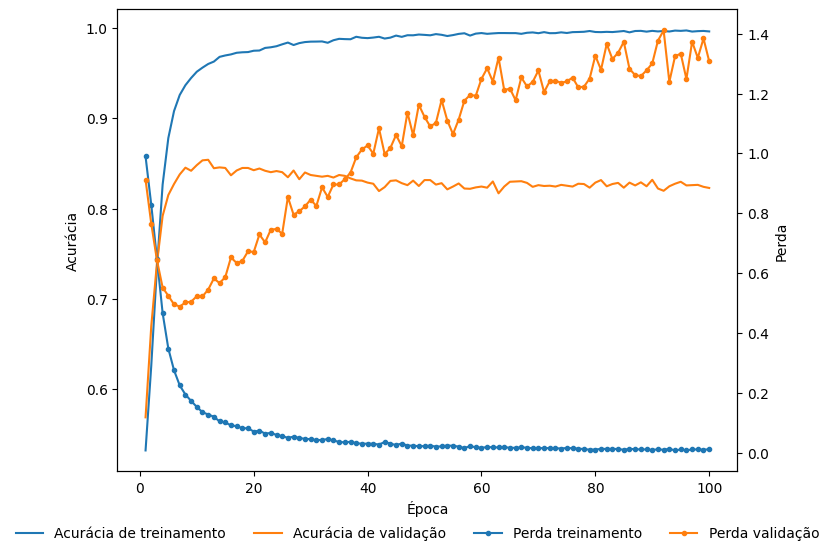

In [83]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)

# plt.plot(epochs, acc, 'o', label='Training acc')
# plt.xlabel("Época")
# plt.ylabel("Acurácia")
# plt.plot(epochs, val_acc, label='Validation acc')
# plt.title('Training and validation accuracy')
# plt.legend()

# plt.figure()

# plt.plot(epochs, loss, 'bo', label='Training loss')
# plt.plot(epochs, val_loss, label='Validation loss')
# plt.legend()

# plt.show()


fig, ax1 = plt.subplots(figsize = (8, 6))

ax2 = ax1.twinx()
ax1.plot(epochs, acc, color='#1f77b4', label='Acurácia de treinamento')
ax1.plot(epochs, val_acc,color='#ff7f0e', label='Acurácia de validação')

ax2.plot(epochs, loss, color='#1f77b4',marker='.', label='Perda treinamento')
ax2.plot(epochs, val_loss, color='#ff7f0e',marker='.', label='Perda validação')

ax1.set_xlabel('Época')
ax1.set_ylabel('Acurácia')
ax2.set_ylabel('Perda')

fig.legend(loc='upper center', bbox_to_anchor=(0.5, 0.04)
          , frameon=False, ncol=4)

plt.show()